In [1]:
def YuMen(x1, x2):
    w1, w2, theta = .5, .5, .7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [2]:
YuMen(0, 0)

0

In [3]:
YuMen(0, 1)

0

In [4]:
YuMen(1, 0)

0

In [5]:
YuMen(1, 1)

1

In [6]:
import numpy as np

In [7]:
def YuMen(x1, x2):
    input_x = np.array([x1, x2])
    w = np.array([.5, .5])
    b = -.7
    temp = np.sum(input_x * w) + b
    if temp <= 0:
        return 0
    else:
        return 1

In [8]:
YuMen(1, 1)

1

In [9]:
def YufMen(x1, x2):
    input_x = np.array([x1, x2])
    w = np.array([-.5, -.5])
    b = .7
    temp = np.sum(input_x * w) + b
    if temp <= 0:
        return 0
    else:
        return 1

In [10]:
YufMen(1,1)

0

In [11]:
def OrMen(x1, x2):
    input_x = np.array([x1, x2])
    w = np.array([.5, .5])
    b = -.2
    temp = np.sum(input_x * w) + b
    if temp <= 0:
        return 0
    else:
        return 1

In [12]:
OrMen(1,0)

1

In [13]:
def YiHuoMen(x1, x2):
    s1 = YufMen(x1, x2)
    s2 = OrMen(x1, x2)
    y = YuMen(s1, s2)
    return y

In [14]:
YiHuoMen(0, 0)

0

In [15]:
YiHuoMen(1, 1)

0

In [16]:
def Sigmoid(x):
    h = 1/(1+np.exp(-x))
    return h

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

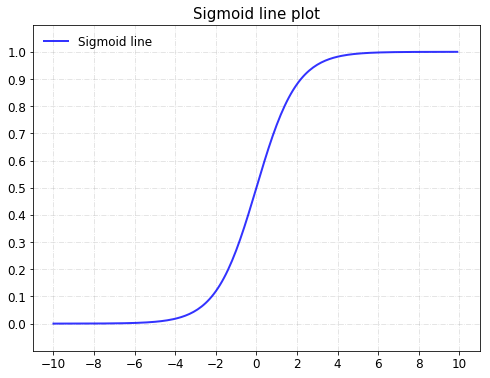

In [21]:
x = np.arange(-10, 10, .1)
y = Sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, c='blue', alpha=.8, linewidth=2, label='Sigmoid line')
plt.ylim(-.1, 1.1)
plt.xlim(-11, 11)
plt.yticks(np.arange(0, 1.1, .1), fontsize=12)
plt.xticks(np.arange(-10, 11, 2), fontsize=12)
plt.title('Sigmoid line plot', color='k', fontsize=15)
plt.grid(linestyle='-.', alpha=.4)
plt.legend(loc=2, frameon=False, fontsize=12)

In [22]:
# 使用numpy实现阶跃函数 
def step_function(x):
    y=x>0 #生成布尔序列
    return y.astype(np.int) #把布尔序列转换成1和 0

In [23]:
x = np.array([-1,1,2])
step_function(x)

array([0, 1, 1])

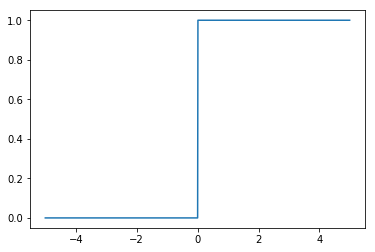

In [24]:
# 绘制阶跃函数图形
x = np.arange(-5,5,0.01) 
y = step_function(x) 
plt.plot(x,y);

In [26]:
def relu(x):
    y = np.maximum(0, x) #从输入的数值中选择较大的那个值输出 
    return y

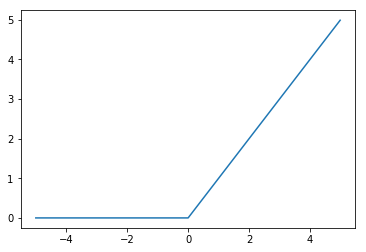

In [27]:
# 绘制 relu函数
x = np.arange(-5,5,0.01) 
y = np.maximum(0,x) 
plt.plot(x,y);

In [28]:
# 矩阵形式
X = np.array([2,4])
W = np.array([[1,3,5],[2,4,6]]) 
Y = np.dot(X,W)
Y

array([10, 22, 34])

In [29]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])
# (2，3) # (2,) # (3,)
print(W1.shape)
print(X.shape)
print(B1.shape)
A1 = np.dot(X,W1) + B1
A1                  # array([0.3, 0.7, 1.1])

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

In [31]:
Z1 = Sigmoid(A1)
print(A1) # [0.3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [33]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]) 
B2 = np.array([0.1,0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3，2)
print(B2.shape) # (2,)
A2 = np.dot(Z1,W2) + B2
Z2 = Sigmoid(A2)
print(A2)       # [0.51615984, 1.21402696]
print(Z2)       # [0.62624937, 0.7710107 ]

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [35]:
# 定义恒等函数
def identity_function(x):
    return x
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])
A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # 相当于 Y = A3 
print(Y) # [0.31682708, 0.69627909]

[0.31682708 0.69627909]


In [40]:
def init_network():
    network = {
        "w1":np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]),
        'b1':np.array([0.1,0.2,0.3]),
        'w2':np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]),
        'b2':np.array([0.1,0.2]),
        'w3':np.array([[0.1,0.3],[0.2,0.4]]),
        'b3':np.array([0.1,0.2])}
    return network

In [41]:
def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3'] 
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, w1) + b1 
    z1 = Sigmoid(a1)
    a2 = np.dot(z1, w2)+ b2 
    z2 = Sigmoid(a2)
    a3 = np.dot(z2, w3) + b3 
    y = identity_function(a3)
    return y

In [42]:
# 测试函数运行结果
network = init_network()
x = np.array([1.0, 0.5]) # 待训练样本
y = forward(network, x) # 训练结果
print(y) # [0.31682708, 0.69627909]

[0.31682708 0.69627909]


In [43]:
# softmax函数 
def softmax(a):
    exp_a = np.exp(a) #指数函数
    sum_exp_a = exp_a.sum() 
    y = exp_a / sum_exp_a
    return y

In [44]:
#测试函数运行结果
a = np.array([0.3,2.9,4.0]) 
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [46]:
np.exp(100)  #2.6881171418161356e+43

2.6881171418161356e+43

In [47]:
np.exp(1000) #inf

/anaconda3/envs/ys/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

In [48]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) #返回 array([nan, nan, nan])，没有被正确计算

/anaconda3/envs/ys/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/anaconda3/envs/ys/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [49]:
c = np.max(a)
np.exp(a - c) / np.sum(np.exp(a - c)) #array([ 9.99954600e-01，4.53978686e-05，2.06106005e-09])

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [50]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 防止溢出
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [51]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

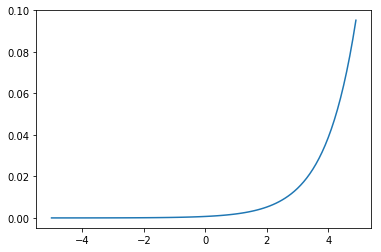

In [57]:
X = np.arange(-5, 5, 0.1)
y = softmax(X)
plt.plot(X, y);

In [58]:
from sklearn.neural_network import MLPClassifier as DNN
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score as cv
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from time import time
import datetime

In [59]:
data = load_breast_cancer()
X = data.data
y = data.target
Xtrain, Xtest, Ytrain, Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [60]:
times = time()
dnn = DNN(hidden_layer_sizes=(100,),random_state=420)
print(cv(dnn,X,y,cv=5).mean())
print(time() - times)

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9296344747979992
1.3969857692718506


In [61]:
#使用决策树进行一个对比
times = time()
clf = DTC(random_state=420) 
print(cv(clf,X,y,cv=5).mean()) 
print(time() - times)

0.9173989996152366
0.04477691650390625


In [66]:
dnn = DNN(hidden_layer_sizes=(100,), max_iter=500, random_state=420).fit(Xtrain,Ytrain)
dnn.score(Xtest,Ytest)

0.9239766081871345

In [63]:
#使用重要参数n_layers_
dnn.n_layers_ 
#可见，默认层数是三层，由于必须要有输入和输出层，所以默认其实就只有一层隐藏层

3

In [64]:
#如果增加一个隐藏层上的神经元个数，会发生什么呢?
dnn = DNN(hidden_layer_sizes=(200,),random_state=420) 
dnn = dnn.fit(Xtrain,Ytrain)
dnn.score(Xtest,Ytest)

0.9181286549707602

1900 0.9298245614035088


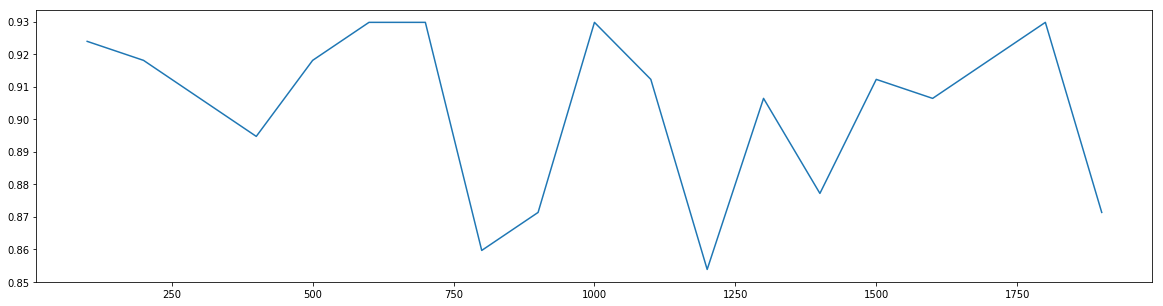

In [67]:
#来试试看学习曲线
s = []
for i in range(100,2000,100):
    dnn = DNN(hidden_layer_sizes=(int(i),), max_iter=500, random_state=420).fit(Xtrain,Ytrain)
    s.append(dnn.score(Xtest,Ytest))
print(i,max(s))
plt.figure(figsize=(20,5))
plt.plot(range(100,2000,100),s)

(100, 100, 100, 100, 100, 100) 0.9239766081871345


Text(0.5, 0, 'Total number of layers')

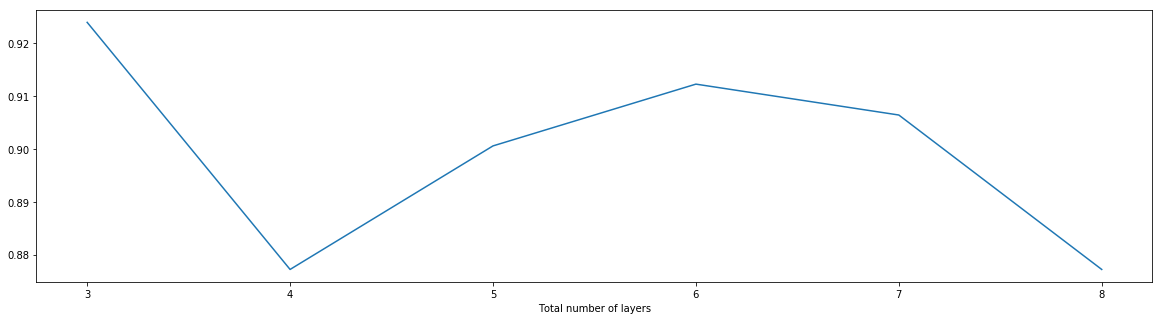

In [70]:
#那如果增加隐藏层，控制神经元个数，会发生什么呢? 
s = []
layers = [(100,),(100,100),(100,100,100),(100,100,100,100),
          (100,100,100,100,100),(100,100,100,100,100,100)]
for i in layers:
    dnn = DNN(hidden_layer_sizes=(i), max_iter=500, random_state=420).fit(Xtrain,Ytrain)
    s.append(dnn.score(Xtest,Ytest))
print(i,max(s))
plt.figure(figsize=(20,5))
plt.plot(range(3,9),s)
plt.xticks([3,4,5,6,7,8])
plt.xlabel("Total number of layers")

(300, 300, 300, 300) 0.9239766081871345


Text(0.5, 0, 'Total number of layers')

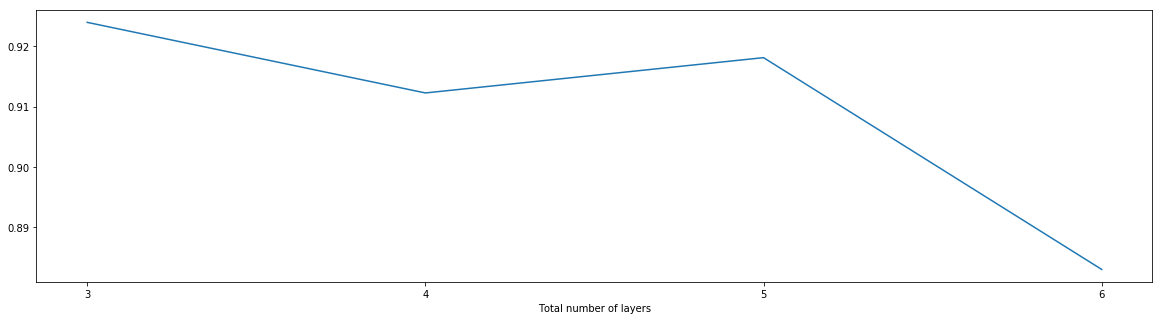

In [72]:
#如果同时增加隐藏层和神经元个数，会发生什么呢? 
s = []
layers = [(100,),(150,150),(200,200,200),(300,300,300,300)]
for i in layers:
    dnn = DNN(hidden_layer_sizes=(i),max_iter=500, random_state=420).fit(Xtrain,Ytrain)
    s.append(dnn.score(Xtest,Ytest))
print(i,max(s))
plt.figure(figsize=(20,5))
plt.plot(range(3,7),s)
plt.xticks([3,4,5,6])
plt.xlabel("Total number of layers")